Les valeurs de la colonne 'Gene' ont été modifiées pour ne conserver que les parties numériques.
Les valeurs de la colonne 'Gene' ont été modifiées pour ne conserver que les parties numériques.
Les valeurs de la colonne 'Gene' ont été modifiées pour ne conserver que les parties numériques.
Les valeurs de la colonne 'Gene' ont été modifiées pour ne conserver que les parties numériques.
Régression Logistique - Accuracy: 0.47619047619047616
Régression Logistique - Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.50      0.42         8
           1       0.60      0.46      0.52        13

    accuracy                           0.48        21
   macro avg       0.48      0.48      0.47        21
weighted avg       0.51      0.48      0.48        21

Forêt Aléatoire - Accuracy: 0.6666666666666666
Forêt Aléatoire - Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      

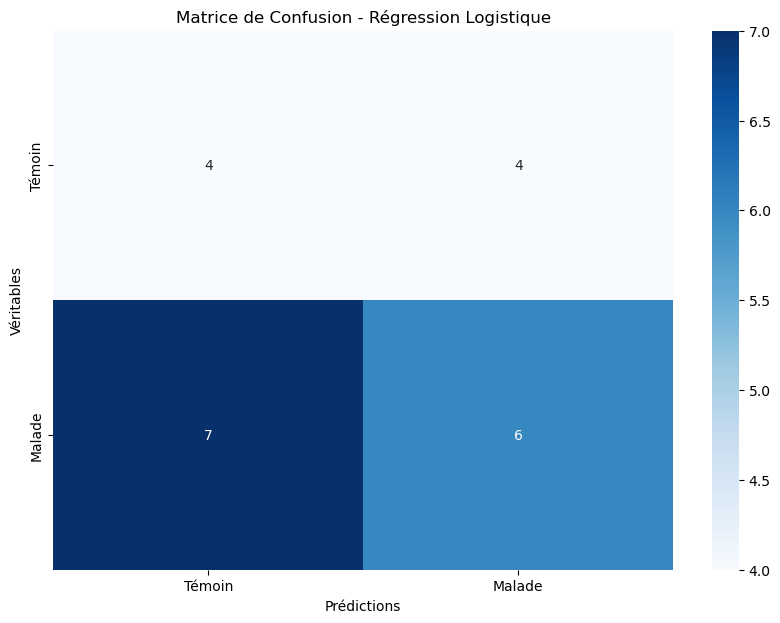

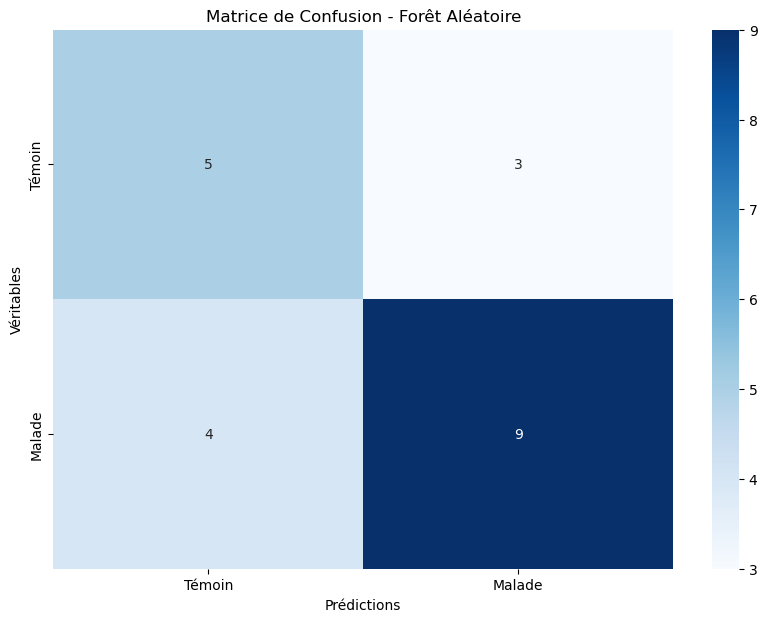

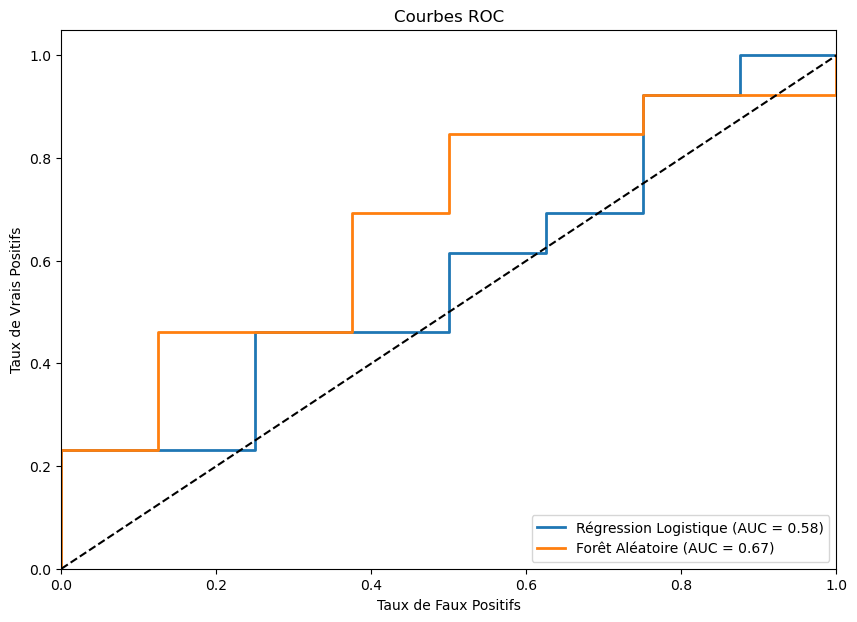

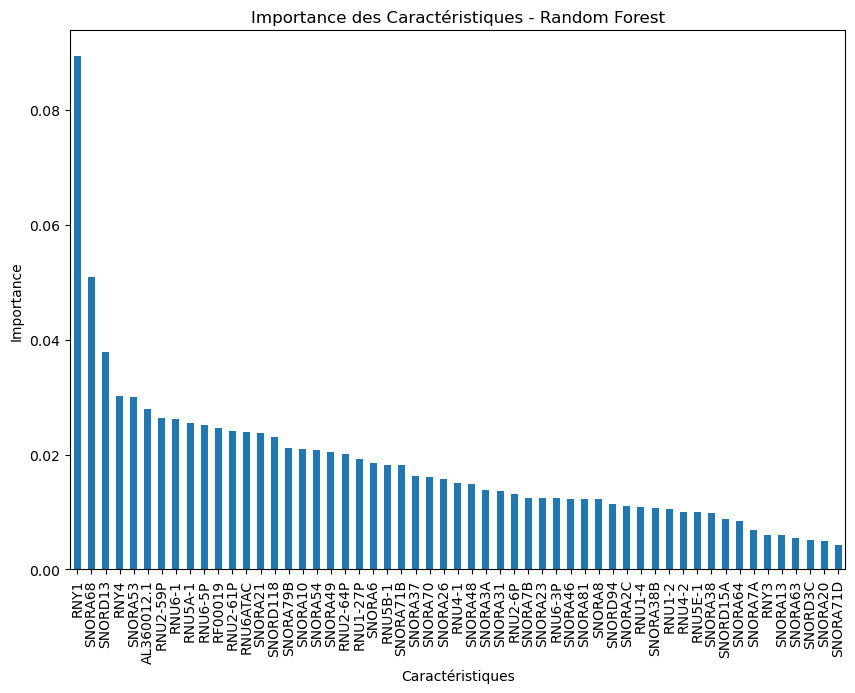

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import re

# Charger les données
data_LB = pd.read_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/vsd_BLymphocytes.csv')
data_LB.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
data_LT = pd.read_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/vsd_TLymphocytes.csv')
data_LT.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
data_Mo = pd.read_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/vsd_Monocytes.csv')
data_Mo.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
data_Ne = pd.read_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/vsd_Neutrophils.csv')
data_Ne.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
meta_data = pd.read_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/METADATA_SORTED_CELL_MCPcounter.tsv', sep='\t')
data_sno_list = pd.read_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/WGCNA_analysis/Sno_gene_list.csv')
data_sno_list.rename(columns={'Unnamed: 0': ''}, inplace=True)

# Extraire les valeurs de la colonne 'Unknows' du tableau sata_sno-list
unknowns_values = data_sno_list['X'].values

# Filtrer chaque tableau pour ne conserver que les lignes où la colonne 'X' correspond aux valeurs d'Unknows
filtered_BLymphocytes = data_LB[data_LB['Gene'].isin(unknowns_values)]
filtered_Neutrophils = data_Ne[data_Ne['Gene'].isin(unknowns_values)]
filtered_TLymphocytes = data_LT[data_LT['Gene'].isin(unknowns_values)]
filtered_Monocytes = data_Mo[data_Mo['Gene'].isin(unknowns_values)]

def transpose_dataframe(df):
    df_transposed = df.transpose()
    new_header = df_transposed.iloc[0]  # La première ligne comme en-tête
    df_transposed = df_transposed[1:]  # Retirer la première ligne du DataFrame
    df_transposed.columns = new_header  # Définir les nouvelles colonnes
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'Gene'}, inplace=True)
    return df_transposed

filtered_Neutrophils_transposed = transpose_dataframe(filtered_Neutrophils)
filtered_BLymphocytes_transposed = transpose_dataframe(filtered_BLymphocytes)
filtered_TLymphocytes_transposed = transpose_dataframe(filtered_TLymphocytes)
filtered_Monocytes_transposed = transpose_dataframe(filtered_Monocytes)


def add_label(df, meta_data):
    # Créer un dictionnaire pour la correspondance entre 'id' et 'condition'
    id_to_condition = meta_data.set_index('ID')['CONDITION'].to_dict()
    
    # Ajouter la colonne 'label' en mappant les valeurs de la colonne 'Gene'
    df['LABEL'] = df['Gene'].map(id_to_condition)
    
    return df

# Ajouter la colonne 'label' aux DataFrames transposés
filtered_Neutrophils_label = add_label(filtered_Neutrophils_transposed, meta_data)
filtered_Monocytes_label = add_label(filtered_Monocytes_transposed, meta_data)
filtered_BLymphocytes_label = add_label(filtered_BLymphocytes_transposed, meta_data)
filtered_TLymphocytes_label = add_label(filtered_TLymphocytes_transposed, meta_data)

def replace_labels(df, column_name='LABEL'):

    # Remplacer 'SJS' par 1 et 'ctrl' par 0 dans la colonne spécifiée
    df[column_name] = df[column_name].replace({'SJS': 1, 'CTRL': 0})
    return df

# remplacer les valeus de la colonne 'LABEL' aux DataFrames transposés
filtered_Neutrophils_label = replace_labels(filtered_Neutrophils_label)
filtered_Monocytes_label = replace_labels(filtered_Monocytes_label)
filtered_BLymphocytes_label = replace_labels(filtered_BLymphocytes_label)
filtered_TLymphocytes_label = replace_labels(filtered_TLymphocytes_label)
#filtered_BLymphocytes_label.to_csv('D:/data_umr_1227/Par_pureté_cyto_digitale/filtered_BLymphocytes_label.csv', index=False)
# Fonction pour extraire la partie numérique des noms de colonnes
def extract_numeric_value(value):
    match = re.search(r'\d+', value)
    return match.group(0) if match else value

# Renommer les colonnes pour ne garder que la partie numérique
# Fonction pour modifier les valeurs d'une colonne spécifique du DataFrame
def modify_column_to_numeric(df, column_name='Gene'):
    # Vérifier si la colonne existe dans le DataFrame
    if column_name in df.columns:
        # Appliquer la fonction d'extraction à la colonne spécifiée
        df[column_name] = df[column_name].apply(extract_numeric_value)
        print(f"Les valeurs de la colonne '{column_name}' ont été modifiées pour ne conserver que les parties numériques.")
    else:
        print(f"La colonne '{column_name}' n'existe pas dans le DataFrame.")
    
    return df

# Appliquer la fonction de renommage
final_data_BLymphocytes = modify_column_to_numeric(filtered_BLymphocytes_label)
final_data_TLymphocytes = modify_column_to_numeric(filtered_TLymphocytes_label)
final_data_Monocytes = modify_column_to_numeric(filtered_Monocytes_label)
final_data_Neutrophils = modify_column_to_numeric(filtered_Neutrophils_label)
#===============================================================================
# Séparer les caractéristiques (features) et les étiquettes (labels)
X_LB = final_data_BLymphocytes.drop(columns=['Gene', 'LABEL'])  # Assurez-vous que 'Label' est le nom correct de votre colonne cible
Y_LB = final_data_BLymphocytes['LABEL']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_LB, Y_LB, test_size=0.3, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialiser et entraîner le modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred_log_reg = log_reg.predict(X_test)

# Évaluer le modèle
accuracy_log_reg = accuracy_score(Y_test, Y_pred_log_reg)
report_log_reg = classification_report(Y_test, Y_pred_log_reg)

print("Régression Logistique - Accuracy:", accuracy_log_reg)
print("Régression Logistique - Classification Report:\n", report_log_reg)

from sklearn.ensemble import RandomForestClassifier

# Initialiser et entraîner le modèle Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
Y_pred_rf = rf.predict(X_test)

# Évaluer le modèle
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
report_rf = classification_report(Y_test, Y_pred_rf)

print("Forêt Aléatoire - Accuracy:", accuracy_rf)
print("Forêt Aléatoire - Classification Report:\n", report_rf)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion pour Régression Logistique
cm_log_reg = confusion_matrix(Y_test, Y_pred_log_reg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Témoin', 'Malade'], yticklabels=['Témoin', 'Malade'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()

# Matrice de confusion pour Forêt Aléatoire
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Témoin', 'Malade'], yticklabels=['Témoin', 'Malade'])
plt.title('Matrice de Confusion - Forêt Aléatoire')
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()

##############################################################################################################
from sklearn.metrics import roc_curve, auc
# Fonction pour dessiner la courbe ROC
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Régression Logistique
Y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(Y_test, Y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Forêt Aléatoire
Y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(10, 7))
plot_roc_curve(fpr_log_reg, tpr_log_reg, roc_auc_log_reg, 'Régression Logistique')
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'Forêt Aléatoire')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC')
plt.legend(loc='lower right')
plt.show()

##########################################################################################################

importances = rf.feature_importances_
feature_names = X_LB.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 7))
feature_importances.plot(kind='bar')
plt.title('Importance des Caractéristiques - Random Forest')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.show()
